# Time and Frequency in EEG 



In [1]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 

In [2]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e

## Frequency Resolution and Units

### In this section we will revisit the notion of frequency resolution, and take that into consideration in designing the units with which we evaluate amplitdue. 



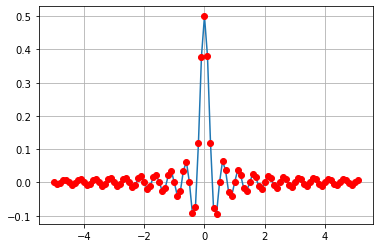

In [3]:
samplingrate = 200 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 2 #This is the total length (in seconds) of the interval. 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
f1 = 20
f = np.arange(15,25.1,0.1)
fplot = f-f1;
nof = np.size(f)
nsamp = np.size(t)
dp = np.zeros(nof)
for j in range(nof):
    es[0] = sinusoid(f[j],t)
    es[1] = sinusoid(f1,t)
    dp[j] = np.sum(es[0]*es[1])/nsamp 
plt.plot(fplot,dp)
plt.plot(fplot,dp,'ro')
plt.grid()
plt.show()


### Discretization of Frequency 

#### When we sample the time series, we discretize time by the sampling rate.  In the example above `ts = 1/samplingrate` is 0.05 s. 
#### Whatever value we have at each time step (`t`) is actually a value fixed for an interval time **centered** on that value of `t`

#### Similarly, frequency is discrate. The frequency resolved by the FFT depends on the interval `T` as 

#### $$ f_n = n/T $$ where n is any integer upto the number of samples divided by 2 (Nyquist theorem).  

#### so if `T` = 2s, $f_n = n/T = n/2 = 0,0.5,1,1.5,2...... $

* ####  f = 0.5 is the **interval** [0.25,0.75]
* ####  f = 1 is the **interval** [0.75, 1.25]

####  if `T` = 0.5s, $f_n = n/T = n/0.5 =  0,2,4,6,8....... $

* ####  f = 2 is the **interval** [1,3]
* ####  f = 4 is the **interval** [3, 5]

* Fs = 100/s 
* ts = 1/100 = 0.01 
* 10s  - 50 microvoltage when saying at 10s, it actuals is in an interval [9.995, 10.005]
* with the interval that share the boundary, the boundary timepoint will be eaqually distributed into two intervals 
* in the form of the graph, it is like each red dot(bin) will represent an interval of time instead of the timepoint it is ploted into. It choose the domiant frequency to represent the frequency in that interval 



dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


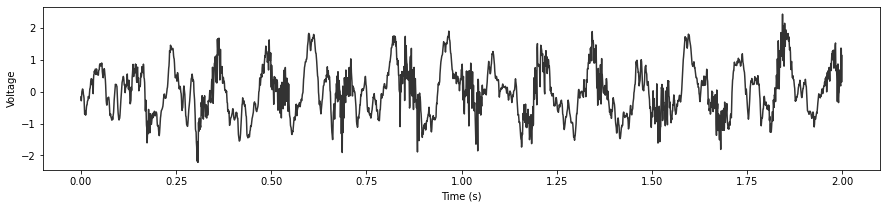

In [4]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps
T = 2# segment length 
nsamp = int(T*fs) # number of samples is the segment length

lfp = data['lfp'][0,:]/1000 
lfp_short = lfp[range(0,nsamp)] # make a variable that has only the first T seconds of the LFP
t_short = np.arange(0, nsamp*deltaT, deltaT) # create the corresponding time vector
plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');
plt.ylabel('Voltage');
plt.show()

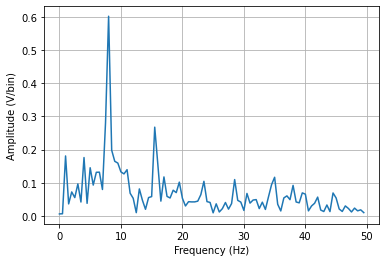

In [5]:
#FFT the whole thing.  
xf = fft(lfp_short) #take the fft 
deltaF = 1/T 
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF
maxf = 50  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index corresponding to highest frequency to plot.  
plt.plot(f_n[0:maxbin],amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V/bin)')
plt.grid(True)
plt.show()


* the unit of the y-axis is Voltage/bin 

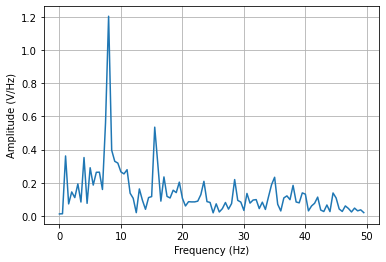

In [6]:
#FFT the whole thing.  
xf = fft(lfp_short) #take the fft 
deltaF = 1/T 
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF
maxf = 50  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index corresponding to highest frequency to plot.  
amplitude = amplitude/deltaF # amplitude is in V/bin. deltaF is hz/bin  
plt.plot(f_n[0:maxbin],amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V/Hz)')
plt.grid(True)
plt.show()

* it is not always ideal to have V/bin as the unit cause the graph can vary 
* therefore using V/Hz === deltaf = 1/T = 1/2 = Hz/bin
* A/delta f = (V/bin) / (Hz/bin) = V/Hz
* the ultimate goal is to calculate the amplitude -- Power is the variation 
* amplitude the absolute value of the standard deviation of the variation 

#### Power versus Amplitude 

#### For theoretical reasons (and for some less objective reasons) some results are presented as power rather than amplitde. 

#### Power is the amplitude squared.  Theoretically, it has the same properties as variance, and hence is more useful for theory development.  

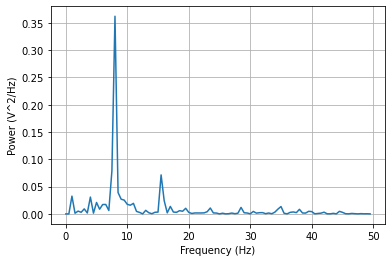

In [7]:
xf = fft(lfp_short) #take the fft 
deltaF = 1/T 
power = 2*(np.abs(xf)/nsamp)**2
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF
maxf = 50  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index corresponding to highest frequency to plot.  
power = power/deltaF # amplitude is in V/bin. deltaF is hz/bin  
plt.plot(f_n[0:maxbin],power[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.grid(True)
plt.show()

* the unit of power = V^2/Hz 

## Temporal Evolution of EEG spectrum 



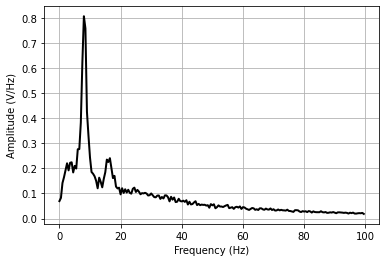

In [8]:
#d averaging them together. 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 100  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 
nepochs = 40
amplitude = np.zeros((nepochs,nf)) #I made an empty array to hold the amplitude spectra of each frequency 
for j in range(nepochs):
    lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
    xf = fft(lfp_short)
    amplitude[j,:] = 2*np.abs(xf[0:nf])/nsamp #always divide by number of samples. 2 x for negative frequencies 
#    plt.plot(f_n[0:maxbin],amplitude[j,0:maxbin]) #plot the individual epoch spectra (YOU DONT NEED TO DO THIS FOR THE HWK)
amplitude_avg = np.mean(amplitude,axis = 0) #take the average over all epochs
amplitude_avg = amplitude_avg/deltaF
plt.plot(f_n[0:maxbin],amplitude_avg[0:maxbin],'k',linewidth=2) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V/Hz)')
plt.grid(True)
plt.show()

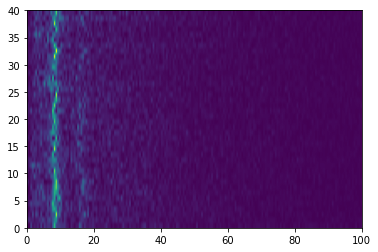

In [9]:
plt.imshow(amplitude[:,0:maxbin],aspect = 'auto',origin='lower',extent = [0,maxf,0,nepochs])
plt.show()

Time on the y-axis and signal on x-axis 

In [10]:
#lets load some P300 ERP data 

data = loadmat('../Exercises/data/2_P3.mat')
blocktarget = data['blocktarget']
channelnames = data['channelnames']
eeg = data['eeg']
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']
target = data['target']
eeg = eeg*10**6


Text(0.5, 1.0, 'Pz')

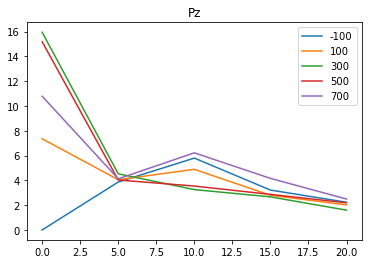

In [11]:
channelno = 12 #25
c_eeg = np.squeeze(eeg[:,channelno,:])
T = 0.2
nsamps = int(T*samplingrate)
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 

for j in range(5):
    tempf = fft(c_eeg[:,j*nsamps:(j+1)*nsamps])
    amplitude = 2*np.abs(tempf)/nsamps
    amplitude_avg = np.mean(amplitude,axis = 0)
    plt.plot(f_n[0:5],amplitude_avg[0:5])

plt.legend(('-100','100','300','500','700'))
plt.title(channelnames[channelno])

## Quantifying the ERP 

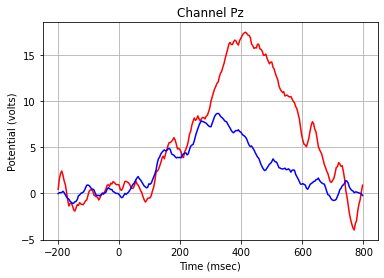

In [12]:
erp_target = np.mean(eeg[(goodtrials == 1)&(blocktarget > 0),:,:],axis =0)
erp_standard = np.mean(eeg[(goodtrials == 1)&(blocktarget == 0),:,:],axis =0)
plt.plot(eeg_time,erp_target[12,:],'r')
plt.plot(eeg_time,erp_standard[12,:],'b')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Potential (volts)')
plt.grid()
plt.show()

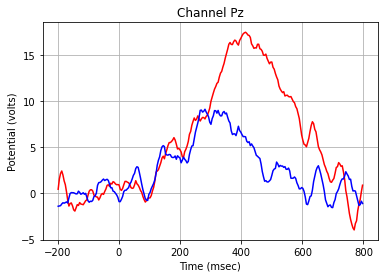

In [14]:
## Lets take care of the random number genearator properly. 
rng = np.random.default_rng(1234)  # The seed can be changed to make a new randomization
###
target_index = np.where(blocktarget > 0)[0]  #notice i had to take the first item from the output to np.where.  This is because where returns it in a list. 
standard_index = np.where(blocktarget == 0)[0] 
rand_standards = rng.permutation(standard_index)
ntargets = len(target_index)
erp_target = np.mean(eeg[target_index,:,:],axis =0)
erp_standard = np.mean(eeg[rand_standards[0:ntargets],:,:],axis =0)
plt.plot(eeg_time,erp_target[12,:],'r')
plt.plot(eeg_time,erp_standard[12,:],'b')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Potential (volts)')
plt.grid()
plt.show()

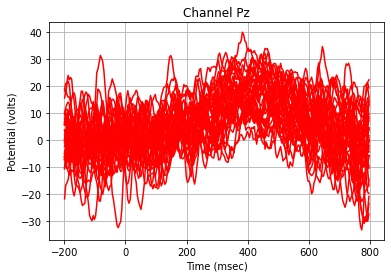

In [16]:
for j in target_index:
    plt.plot(eeg_time,eeg[j,12,:],'r')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.ylabel('Potential (volts)')
plt.grid()
plt.show()